## Analyze ZSCG results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**1. Untarget attack on MNIST with** $L_{\infty}$

In [17]:
BASE_PATH = 'classic_cifar10_untarget_'

df005 = pd.read_csv('{}005.csv'.format(BASE_PATH), index_col = 0) 
df01 = pd.read_csv('{}01.csv'.format(BASE_PATH), index_col = 0)
df02 = pd.read_csv('{}02.csv'.format(BASE_PATH), index_col = 0).iloc[1:, :]
df005

,Succes Rate,Time per attack,# Gradient Estimation,Alpha,Gaussian Smoothing
0,0.36,12.603189,500,0.2,0.001
1,0.40,22.024377,1000,0.2,0.001
2,0.50,37.621703,2000,0.2,0.001
3,0.56,63.898495,4000,0.2,0.001
5,0.60,45.551701,8000,0.2,0.001
6,0.66,75.441402,16000,0.2,0.001


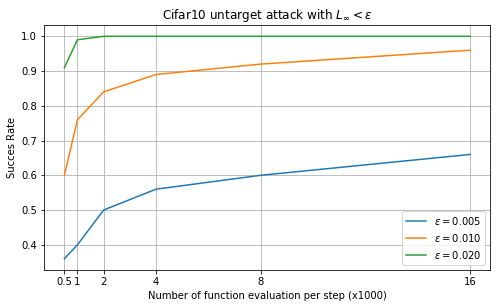

In [12]:
fig = plt.figure(figsize=(8, 4.5))
plt.title('Cifar10 untarget attack with $L_{\infty} < \epsilon$')
plt.plot(df005['# Gradient Estimation'], df005['Succes Rate'], label=r'$\epsilon = 0.005$')
plt.plot(df01['# Gradient Estimation'], df01['Succes Rate'], label=r'$\epsilon = 0.010$')
plt.plot(df02['# Gradient Estimation'], df02['Succes Rate'], label=r'$\epsilon = 0.020$')
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks( [500, 1000, 2000, 4000, 8000, 16000], [0.5, 1, 2, 4, 8, 16], rotation=0)
plt.legend()
plt.grid()
plt.show()

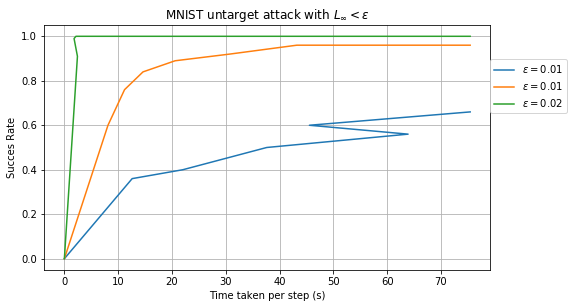

In [13]:
max_time = [df005['Time per attack'].max()]

def SR(df):
    return [0] + df['Succes Rate'].tolist() + [df['Succes Rate'].max()]




fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
plt.plot([0] + df005['Time per attack'].tolist() + max_time, SR(df005), label=r'$\epsilon = 0.01$')
plt.plot([0] + df01['Time per attack'].tolist() + max_time, SR(df01), label=r'$\epsilon = 0.01$')
plt.plot([0] + df02['Time per attack'].tolist() + max_time, SR(df02), label=r'$\epsilon = 0.02$')

plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

**2. Target attack on MNIST with** $L_{\infty}$

In [22]:
BASE_PATH = 'classic_cifar10_target_'

dft02 = pd.read_csv('{}02.csv'.format(BASE_PATH), index_col = 0).sort_values(by='# Gradient Estimation')
dft02

,Succes Rate,Time per attack,# Gradient Estimation,Alpha,Gaussian Smoothing
1,0.488889,4.527152,500,0.2,0.001
2,0.666667,6.401701,1000,0.2,0.001
3,0.777778,9.864016,2000,0.2,0.001
0,0.955556,9.286921,4000,0.2,0.001
4,0.944444,19.394981,8000,0.2,0.001


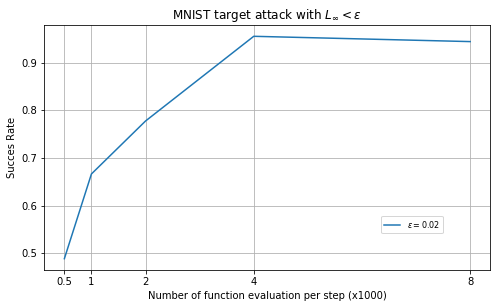

In [23]:
fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST target attack with $L_{\infty} < \epsilon$')
plt.plot(dft02['# Gradient Estimation'], dft02['Succes Rate'], label=r'$\epsilon = 0.02$')
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks( [500, 1000, 2000, 4000, 8000], [0.5, 1, 2, 4, 8], rotation=0)
plt.legend(loc=[0.755, 0.15], prop={'size': 8})
plt.grid()
plt.show()

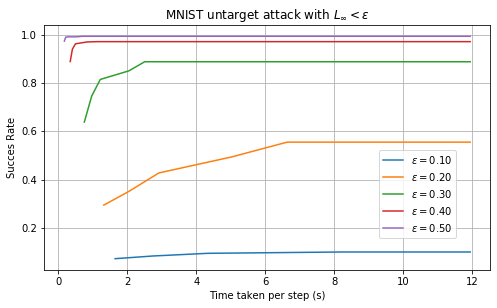

In [141]:
max_time = [dft10['Time per attack'].max()]
def max_SR(df):
    return df['Succes Rate'].tolist()  + [df['Succes Rate'].max()]


fig = plt.figure(figsize=(8, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
plt.plot(dft10['Time per attack'], dft10['Succes Rate'], label=r'$\epsilon = 0.10$')
plt.plot(dft20['Time per attack'].tolist() + max_time, max_SR(dft20), label=r'$\epsilon = 0.20$')
plt.plot(dft30['Time per attack'].tolist() + max_time, max_SR(dft30), label=r'$\epsilon = 0.30$')
plt.plot(dft40['Time per attack'].tolist() + max_time, max_SR(dft40), label=r'$\epsilon = 0.40$')
plt.plot(dft50['Time per attack'].tolist() + max_time, max_SR(dft50), label=r'$\epsilon = 0.50$')
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend(loc = [0.75, 0.13])
plt.grid()
plt.show()